# Iris dataset - Regressão Logística - 3 classes

## Objetivos

Este notebook ilustra o problema de classificação.

O objetivo é classificar as amostras da Íris em 3 classes.
- o alvo é o índice da classe: 0, 1 ou 2
- função de perda é Entropia Cruzada
- rede é uma camada densa linear com duas entradas e três saídas (n. de classes)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmax_CrossEntropy_Otimizacao.png)

## Importação das bibliotecas

In [1]:
# http://pytorch.org/
from os.path import exists
import torch

In [2]:
%matplotlib inline
import os
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display

## Dataset: Leitura, normalização e visualização dos dados

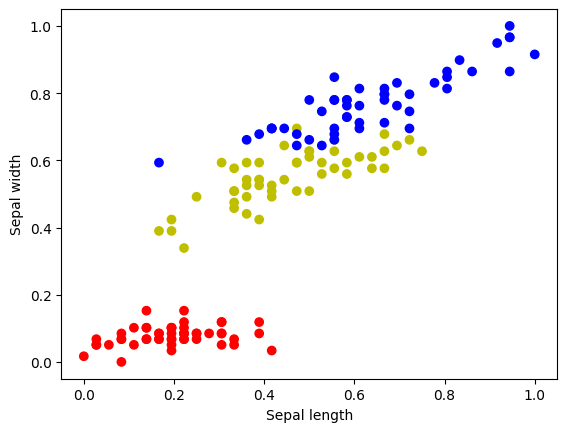

In [3]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y = iris.target
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [4]:
print(Y[:5])

[0 0 0 0 0]


In [5]:
print(Xc[0:5])

[[0.22222222 0.06779661]
 [0.16666667 0.06779661]
 [0.11111111 0.05084746]
 [0.08333333 0.08474576]
 [0.19444444 0.06779661]]


### Prepara os dados para o PyTorch

In [6]:
X_tensor = torch.FloatTensor(Xc)  # Entrada é FloatTensor
Y_tensor = torch.LongTensor(Y)    # Classe é LongTensor (Inteiros)

In [7]:
Y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Construindo o modelo da rede

A saída da rede é composta por um neurônio para cada classe. A saída é denominada *scores* ou logitos:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLogisticaRede_2_3.png)

In [8]:
model = nn.Linear(2,3)  # 2 entradas e 3 saídas. Bias setado como True por Default


In [9]:
model.state_dict() #Valores dos pesos e Bias (9 parâmetros da Rede)



OrderedDict([('weight',
              tensor([[-0.1286, -0.0701],
                      [-0.0489, -0.4969],
                      [ 0.6888,  0.2925]])),
             ('bias', tensor([-0.3651,  0.5096,  0.2314]))])

In [10]:
model.bias #Valores de Bias

Parameter containing:
tensor([-0.3651,  0.5096,  0.2314], requires_grad=True)

In [11]:
model.weight # Peso das entradas

Parameter containing:
tensor([[-0.1286, -0.0701],
        [-0.0489, -0.4969],
        [ 0.6888,  0.2925]], requires_grad=True)

### Fazendo um predict

In [12]:
X_tensor[0]

tensor([0.2222, 0.0678])

In [13]:
model.bias

Parameter containing:
tensor([-0.3651,  0.5096,  0.2314], requires_grad=True)

In [14]:
model.weight

Parameter containing:
tensor([[-0.1286, -0.0701],
        [-0.0489, -0.4969],
        [ 0.6888,  0.2925]], requires_grad=True)

In [15]:
out=model(Variable(X_tensor[0]))
out

tensor([-0.3984,  0.4650,  0.4043], grad_fn=<ViewBackward0>)

X_tensor[0] . weight.T + bias

0.222 * 0.3929 + 0.0678 * 0.2961 + 0.1088 = 0.2162

0.222 * 0.2621 + 0.0678 * 0.5624 - 0.4734 = -0.3771

0.222 * 0.2875 + 0.0678 * (-0.1609) + 0.0587 = 0.1116

In [16]:
out = model(Variable(X_tensor[:4,:])) # 4 amostras
out

tensor([[-0.3984,  0.4650,  0.4043],
        [-0.3913,  0.4678,  0.3660],
        [-0.3830,  0.4789,  0.3228],
        [-0.3818,  0.4634,  0.3135]], grad_fn=<AddmmBackward0>)

### Calculando as probabilidades com Softmax

- [Wikipedia:Softmax_function](https://en.wikipedia.org/wiki/Softmax_function)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/softmax.png)

In [17]:
oo = F.softmax(out,dim=1) #Transforma os valores reais em vetores de probabilidades
oo

tensor([[0.1785, 0.4232, 0.3983],
        [0.1820, 0.4298, 0.3882],
        [0.1854, 0.4390, 0.3756],
        [0.1875, 0.4366, 0.3759]], grad_fn=<SoftmaxBackward0>)

In [18]:
F.softmax(out,dim=1)*100

tensor([[17.8479, 42.3239, 39.8282],
        [18.2038, 42.9773, 38.8189],
        [18.5432, 43.9014, 37.5554],
        [18.7524, 43.6621, 37.5855]], grad_fn=<MulBackward0>)

### Predição da classe

In [19]:
#Classes com maiores probabilidades nas primeiras 4 instâncias de entrada e suas respectivas probabilidades

prob, y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)


tensor([1, 1, 1, 1])
tensor([0.4232, 0.4298, 0.4390, 0.4366], grad_fn=<MaxBackward0>)


## Treinamento

### Classe para visualização dinâmica

In [20]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.viridis)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.viridis)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.viridis)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.viridis)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [21]:
lr = 0.15 # learning rate

optimizer = torch.optim.SGD(model.parameters(), lr=lr) #Gradiente Descendente Estocástico
criterion = nn.CrossEntropyLoss() #Função de Custo / Perda

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

Final loss: 0.2072761356830597


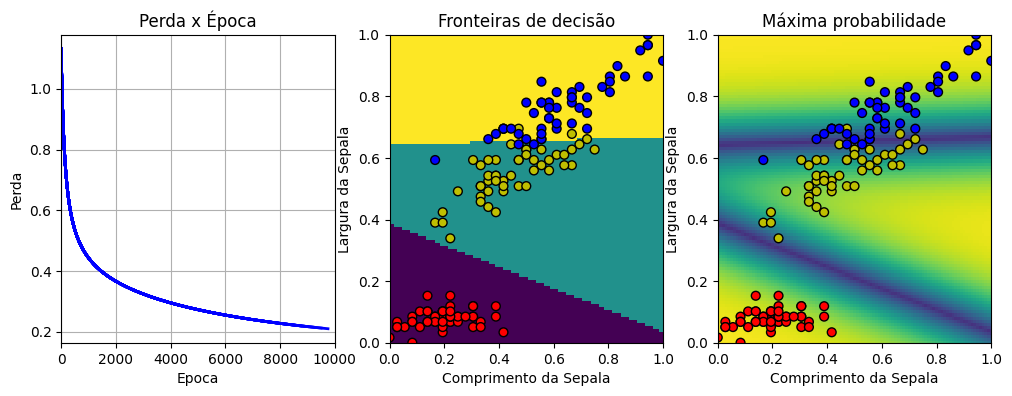

In [22]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad() #Zera os gradientes acumulados anteriormente
    loss.backward() # Back propagation. Cálculo do gradiente.
    optimizer.step() #Atualiza os parâmetros do modelo com base nos gradientes que foram calculados na etapa anterior

    losses.append(loss.data.item()) #Adiciona a perda dessa época a uma lista

    my_plot.on_epoch_end(i, {'loss': loss.data.item()}); # Visualização Gráfica
    final_loss = loss.data.item()

print('Final loss:', final_loss) # Função de Custo ao final da época

## Avaliação

### Parâmetros após treinamento

In [23]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.9343, -14.7673],
                      [  1.9653,  -0.7674],
                      [  1.4804,  15.2601]])),
             ('bias', tensor([ 7.1442,  1.7444, -8.5128]))])

### Salvando os parâmetros treinados

In [24]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [25]:
! ls ../models/

RegrLog_Iris.pt


In [26]:
nn.init.constant(model.weight,0) #Iniciando uma rede com os pesos = 0, exceto o Bias
model.state_dict()

<ipython-input-26-3d86823398be>:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0) #Iniciando uma rede com os pesos = 0, exceto o Bias


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 7.1442,  1.7444, -8.5128]))])

### Recuperando os pesos salvos

In [27]:
# Carregamentos dos pesos salvos no arquivo 'RegrLog_Iris.pt'

param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[ -2.9343, -14.7673],
                      [  1.9653,  -0.7674],
                      [  1.4804,  15.2601]])),
             ('bias', tensor([ 7.1442,  1.7444, -8.5128]))])

### Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [28]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.96


### Matriz de confusão

A avaliação dos resultados será feita utilizando a ferramenta Classification Report. Ela apresenta as principais métricas utilizadas no aprendizado supervisionado de Classificação

- Precisão: Percentual de acerto do modelo para as categorias previstas

(Verdadeiros positivos previstos / Verdadeiros positivos previstos + Falsos positivos previstos)

- Recall: Percentual de acerto do modelo para as categorias reais

(Verdadeiros positivos previstos / Verdadeiros positivos previstos + Falsos negativos previstos)


- F1-score: Média harmônica de Precisão e Recall

- Acurácia média do modelo: Percentual de acerto se considerada todas as categorias previstas.

In [29]:
import pandas as pd
pd.crosstab(Y_pred, Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



<Figure size 1600x1200 with 0 Axes>

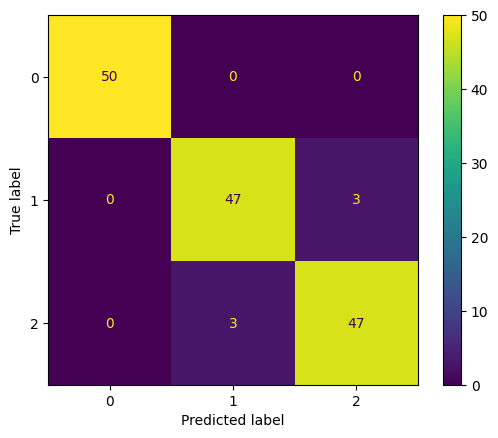

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(Y, Y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(Y, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
cmd.plot()

plt.show()

## Atividades

### Perguntas:

1. Observe que se após o treinamento, a célula for executada novamente, ela continua utilizando os parâmetros treinados até sua última execução. O que é preciso fazer para que o treinamento comece deste o início, como da primeira vez que foi executado?

**Instanciar novamente o modelo com model = nn.Linear(in_features=2, out_features=3)**

2. Quantos parâmetros possui esta rede? Quantos são da camada densa e quantos são de bias?

**Essa rede possui 9 parâmetros sendo 6 da camada densa (3 para cada variável de entrada) e 3 para o bias. 2x3 + 3 = 9**


3. Quantas entradas e quantas saídas esta rede possui?
**2 entradas e 3 saídas. O bias não é considerado entrada**

4. Como se pode calcular a acurácia a partir da matriz de confusão?
**A acurácia é calculada através da divisão da quantidade de valores que foram *corretamente* preditos pela quantidade *total* de valores que foram preditos (Certos e errados)**

5. O que faz a função `torch.max`? Quantos parâmetros ela retorna e quais seus significados?

**Retorna os máximos valores de um Tensor. Nesse trabalho ela foi utilizada para retornar a categoria com a maior probabilidade dentre as probabilidades previstas pelo modelo**
    - http://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.max

### Exercícios:

1. Experimente refazer o treinamento com diferentes valores de learning rate

**Feito na sub-seção abaixo**

2. Na opção de mostrar o valor das probabilidades no gráfico do espaço de atributos,
troque a tabela de cores **magma** utilizada no `pcolormesh` que está com o parâmetro `cmap=plt.cm.magma`. Escolha a tabela de cores consultando o manual do matplotlib:

**Alterado no código original**

    - https://matplotlib.org/users/colormaps.html

3. Observando o gráfico de máxima probabilidade, responda:
    1. Qual é a amostra classificada corretamente, com maior probabilidade?
    **Seria uma amostra que estivesse dentro da faixa da sua classe verdadeira e mais distante dos limites / divisórias de classes (faixa mais escura). Podemos estimar que seria a amostra onde os valores são bem próximos a [0,0]**

    2. Qual é a amostra classificada erradamente, com maior probabilidade?
    **Amostra que estivesse dentro da faixa de outra classe mais distante dos limites / divisórias de classes (faixa mais escura). Podemos estimar que seria a amostra na cor azul onde os valores são bem próximos a [0.2,0.6]**

    3. Qual é a amostra classificada corretamente, com menor probabilidade?
    **Amostra que estivesse dentro da faixa da sua classe verdadeira e mais próxima dos limites / divisórias de classes (faixa mais escura). Podemos estimar que seria a amostra onde os valores são bem próximos a [0.65,0.7]**

    4. Qual é a amostra classificada erradamente, com menor probabilidade?
    **Amostra que estivesse dentro da faixa de outra classe e mais próxima dos limites / divisórias de classes (faixa mais escura). Podemos estimar que seria a amostra onde os valores são bem próximos a [0.58, 0,64]**

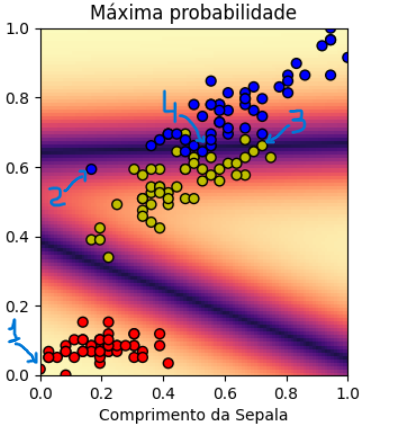

###Exercício 1
Valores de learning rate treinados: 0.1 , 0.3 e 0.5

| Learning Rate | Acurácia | Final Loss (10000 épocas)|
| -------- | -------- | -------- |
| 0.1 | 0.947 | 0.24|
| 0.15 | 0.96 | 0.20|
| 0.3 | 0.96| 0.16|
| 0.5| 0.953| 0.13|


O aumento no valor de Learning rate (de 0.1 até 0.5) diminuiu a perda após 10000 épocas porem a acurácia diminui um pouco com o aumento da learning rate dentro da faixa de 0.1 a 0.5

In [31]:
#1.1
model = nn.Linear(in_features=2, out_features=3)

lr = 0.1 # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr) #Gradiente Descendente Estocástico
criterion = nn.CrossEntropyLoss() #Função de Custo / Perda


Final loss: 0.24372054636478424


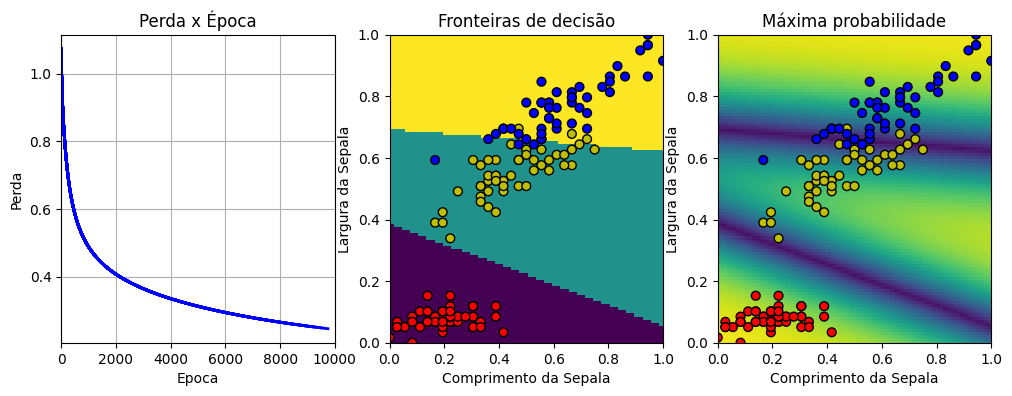

In [32]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad() #Zera os gradientes acumulados anteriormente
    loss.backward() # Back propagation. Cálculo do gradiente.
    optimizer.step() #Atualiza os parâmetros do modelo com base nos gradientes que foram calculados na etapa anterior

    losses.append(loss.data.item()) #Adiciona a perda dessa época a uma lista

    my_plot.on_epoch_end(i, {'loss': loss.data.item()}); # Visualização Gráfica
    final_loss = loss.data.item()

print('Final loss:', final_loss) # Função de Custo ao final da época

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Training Accuracy:  0.9466666666666667


<Figure size 1600x1200 with 0 Axes>

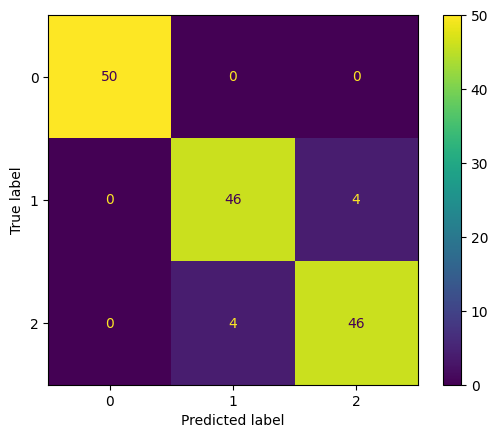

In [33]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(Y, Y_pred))

Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

plt.figure(figsize = (16,12))
cm = confusion_matrix(Y, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
cmd.plot()

plt.show()

In [34]:
#1.2
model = nn.Linear(in_features=2, out_features=3)

lr = 0.3 # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr) #Gradiente Descendente Estocástico
criterion = nn.CrossEntropyLoss() #Função de Custo / Perda


Final loss: 0.1561787724494934


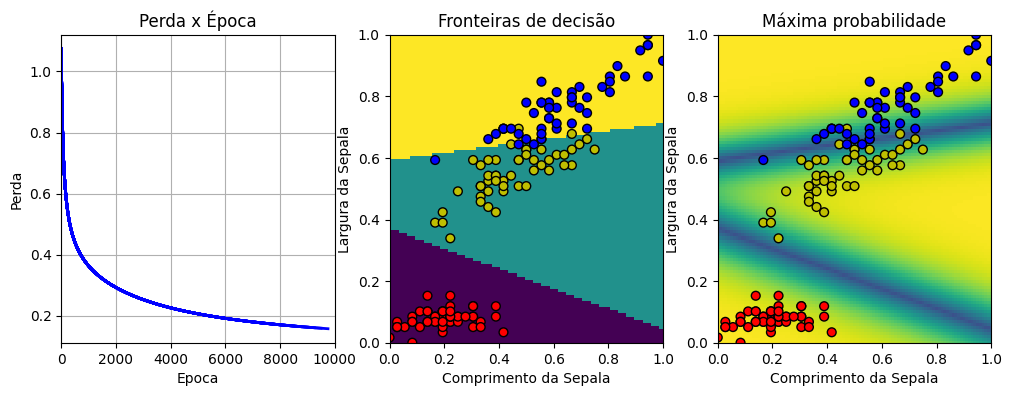

In [35]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad() #Zera os gradientes acumulados anteriormente
    loss.backward() # Back propagation. Cálculo do gradiente.
    optimizer.step() #Atualiza os parâmetros do modelo com base nos gradientes que foram calculados na etapa anterior

    losses.append(loss.data.item()) #Adiciona a perda dessa época a uma lista

    my_plot.on_epoch_end(i, {'loss': loss.data.item()}); # Visualização Gráfica
    final_loss = loss.data.item()

print('Final loss:', final_loss) # Função de Custo ao final da época

Training Accuracy:  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



<Figure size 1600x1200 with 0 Axes>

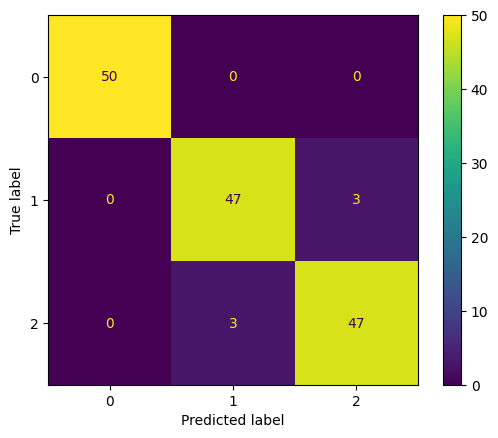

In [36]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

print(classification_report(Y, Y_pred))

plt.figure(figsize = (16,12))
cm = confusion_matrix(Y, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
cmd.plot()

plt.show()

In [37]:
#1.3
model = nn.Linear(in_features=2, out_features=3)

lr = 0.5 # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr) #Gradiente Descendente Estocástico
criterion = nn.CrossEntropyLoss() #Função de Custo / Perda


Final loss: 0.12973140180110931


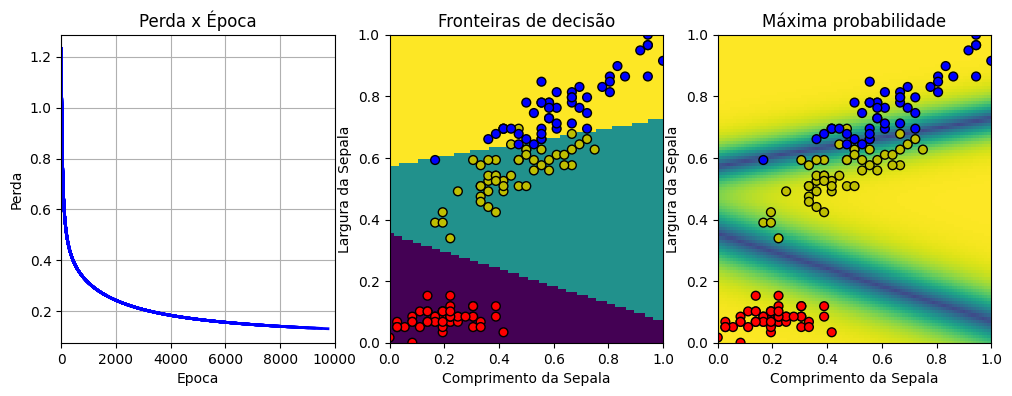

In [38]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad() #Zera os gradientes acumulados anteriormente
    loss.backward() # Back propagation. Cálculo do gradiente.
    optimizer.step() #Atualiza os parâmetros do modelo com base nos gradientes que foram calculados na etapa anterior

    losses.append(loss.data.item()) #Adiciona a perda dessa época a uma lista

    my_plot.on_epoch_end(i, {'loss': loss.data.item()}); # Visualização Gráfica
    final_loss = loss.data.item()

print('Final loss:', final_loss) # Função de Custo ao final da época

Training Accuracy:  0.9533333333333334


<Figure size 1600x1200 with 0 Axes>

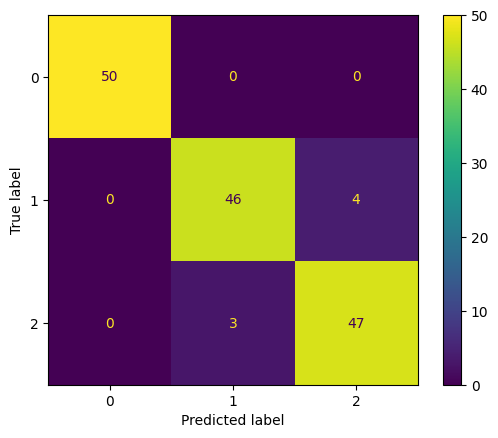

In [39]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

plt.figure(figsize = (16,12))
cm = confusion_matrix(Y, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
cmd.plot()

plt.show()

# Aprendizados

**Regressao Logística**
A regressão logística estima a probabilidade de ocorrência de um evento, como voto ou não voto, com base em um determinado conjunto de dados de variáveis independentes.

Esse tipo de modelo estatístico (também conhecido como modelo logit) frequentemente é usado para classificação e análise preditiva de dados. Como o resultado é uma probabilidade, a variável dependente é limitada entre 0 e 1


**Cross Entropy Loss**

A entropia cruzada, também conhecida como perda logarítmica ou perda de log, é uma função de perda popular usada no aprendizado de máquina para medir o desempenho de um modelo de classificação.
A entropia cruzada mede a diferença entre a distribuição de probabilidade descoberta de um modelo de classificação e os valores previstos.

**Matriz de Confusão**
A matriz de confusão ajuda a avaliar o desempenho do modelo de classificação no aprendizado de máquina comparando os valores previstos com os valores reais de um conjunto de dados.

Uma matriz de confusão (ou matriz de erro) é um método de visualização para resultados de algoritmo classificador. Mais especificamente, é uma tabela que decompõe o número de instâncias da verdade fundamental de uma classe específica em relação ao número de instâncias de classes previstas.

#Conceitos fundamentais

**Redes Neurais:**: Uma rede neural é um programa, ou modelo, de aprendizado de máquina que toma decisões de uma forma semelhante ao cérebro humano, utilizando processos que imitam a maneira como os neurônios biológicos trabalham juntos para identificar fenômenos, ponderar opções e chegar a conclusões.

Toda rede neural é composta por camadas de nós, ou neurônios artificiais: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó se conecta a outros e possui seu próprio peso e limiar associados

**Gradiente Descendente:**O gradiente descendente é um algoritmo de otimização comumente usado para treinar modelos de aprendizado de máquina e redes neurais. Ele treina modelos de aprendizado de máquina ao minimizar os erros entre os resultados previstos e os reais.

Os conceitos de Redes Neurais e gradientes descendentes foram utilizados nesse projeto para realizar um algoritmo de regressão linear com base nos dados Iris.


**Etapas do Laço de treinamento:**
- Predição dos valores com base nos dados de entrada (X)

- Cálculo da função perda. MSE foi usada no projeto.
  
  Perda de entropia cruzada / binária poderia ser usada para modelos de classificação.

- Cálculo do gradiente (utilizando a função perda e o learning rate)

- Atualização dos pesos iniciais usando o gradiente calculado

**Learning rate:** Taxa de aprendizagem. Parâmetro fundamental para o cálculo o gradiente descendente. Pequenos valores de Learning rate podem levar a um aprendizado mais lenta (mais épocas necessárias), grandes valores podem levar a um treinamento instável com dificuldade para convergir para a melhor solução